### Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

### 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [45]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# version check for PyTorch
torch.__version__

'2.2.1+cu121'

In [46]:
# Setting up the device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"device: {device}")

device: cpu


In [47]:
# Data

weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f'length of X and y are: {len(X)}')

length of X and y are: 100


In [48]:
# split data
split = int(0.8 * len(X))

# training data initialization
X_train = X[:split]
y_train = y[:split]

# Testing data initialization
X_test = X[split:]
y_test = y[split:]

print(f'length of training data: {len(X_train)} \nlength testing data: {len(X_test)}')

length of training data: 80 
length testing data: 20


In [49]:
# plot prediction module

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize = (10,7))

  # plot training data
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training data")

  # plot testing data
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Required Output")

  # plot predictions (if present)
  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Prediction")

  plt.legend(prop = {'size': 14})

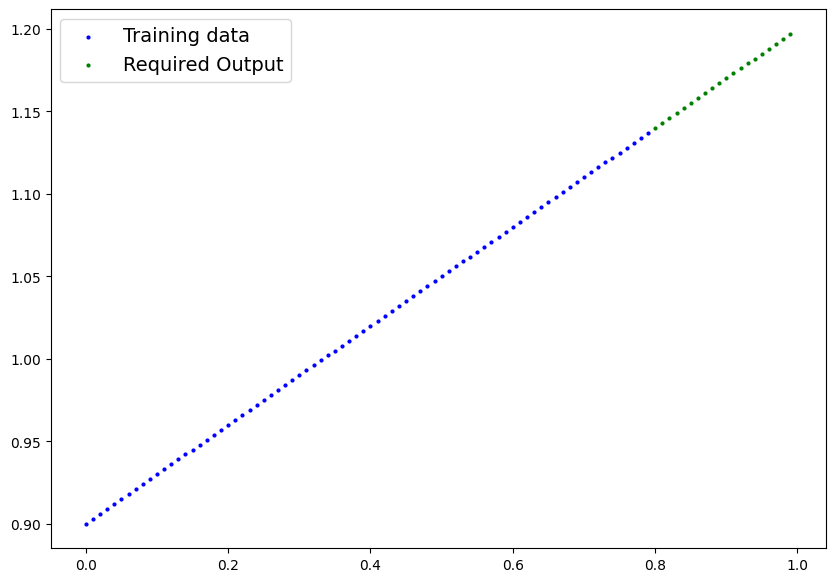

In [50]:
plot_predictions()

### 2. Build a PyTorch model by subclassing `nn.Module`.

* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its `state_dict()`.
* *Note:* If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [51]:
# creating a class for linear regression and inheriting nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # manually initializing the random parameters
    # self.weight = nn.Parameter(torch.randn(1,
    #                                        requires_grad=True,
    #                                        dtype = torch.float))
    # self.bias = nn.Parameter(torch.randn(1,
    #                                      requires_grad = True,
    #                                      dtpye = torch.float))

    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1,)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [52]:
# setting up the manual seed (not necessary)
# torch.manual_seed(42)

# instanciating the class for linear regression
model_test = LinearRegressionModel()

model_test.state_dict()

model_test.eval()
with torch.inference_mode():
  y_predictions_before = model_test(X_test)
y_predictions_before

tensor([[0.8825],
        [0.8912],
        [0.8999],
        [0.9086],
        [0.9173],
        [0.9260],
        [0.9347],
        [0.9434],
        [0.9521],
        [0.9607],
        [0.9694],
        [0.9781],
        [0.9868],
        [0.9955],
        [1.0042],
        [1.0129],
        [1.0216],
        [1.0303],
        [1.0390],
        [1.0477]])

In [53]:
# checking the model's current device
next(model_test.parameters()).device

device(type='cpu')

In [54]:
# making the model use the required device (device agnostic)
model_test.to(device)
next(model_test.parameters()).device

device(type='cpu')

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [55]:
# Setting up the loss function
loss_fn = nn.L1Loss()

# Setting up the optimizer
optimizer = torch.optim.SGD(params = model_test.parameters(),
                            lr = 0.01)

In [56]:
# Traning loop
# epoch_count = []
# train_loss_values = []
# test_loss_values = []

# Putting the data on the target device
# train data
X_train = X_train.to(device)
y_train = y_train.to(device)

# test data
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 300

for epoch in range(epochs):
  # set the model to training mode
  model_test.train()

  # 1. Forward pass
  y_pred = model_test(X_train)

  # 2. Claculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing for every 20 epochs
  if epoch % 20 == 0:
    # setting the model to evaluation mode (turn off gradient tracking and other unrequired monitorings while evaluating the model)
    model_test.eval()

    # entering into the inferencing mode
    with torch.inference_mode():

      # 1. Forward pass
      y_pred_eval = model_test(X_test)

      # Calculating the loss
      loss_eval = loss_fn(y_pred_eval, y_test)

    print(f'epoch: {epoch} ---> Train Loss: {loss} | Test Loss: {loss_eval}')



epoch: 0 ---> Train Loss: 0.48800817131996155 | Test Loss: 0.18987485766410828
epoch: 20 ---> Train Loss: 0.2568032741546631 | Test Loss: 0.08083002269268036
epoch: 40 ---> Train Loss: 0.15892866253852844 | Test Loss: 0.2314838171005249
epoch: 60 ---> Train Loss: 0.1393299400806427 | Test Loss: 0.2780398726463318
epoch: 80 ---> Train Loss: 0.13039803504943848 | Test Loss: 0.2871960699558258
epoch: 100 ---> Train Loss: 0.12320128828287125 | Test Loss: 0.2812637984752655
epoch: 120 ---> Train Loss: 0.11628995090723038 | Test Loss: 0.2680456340312958
epoch: 140 ---> Train Loss: 0.10943591594696045 | Test Loss: 0.2527504563331604
epoch: 160 ---> Train Loss: 0.10258189588785172 | Test Loss: 0.23745527863502502
epoch: 180 ---> Train Loss: 0.09572785347700119 | Test Loss: 0.22216010093688965
epoch: 200 ---> Train Loss: 0.08887382596731186 | Test Loss: 0.20686490833759308
epoch: 220 ---> Train Loss: 0.08201979100704193 | Test Loss: 0.1915697306394577
epoch: 240 ---> Train Loss: 0.0751657634973

### 4. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

To convert from GPU Tensor to CPU Tensor, use `<GPU Tensor>.cpu()`

In [57]:
# Making predictions
model_test.eval()
with torch.inference_mode():
  y_predictions = model_test(X_test)
y_predictions

tensor([[1.2433],
        [1.2490],
        [1.2547],
        [1.2604],
        [1.2661],
        [1.2719],
        [1.2776],
        [1.2833],
        [1.2890],
        [1.2947],
        [1.3004],
        [1.3062],
        [1.3119],
        [1.3176],
        [1.3233],
        [1.3290],
        [1.3348],
        [1.3405],
        [1.3462],
        [1.3519]])

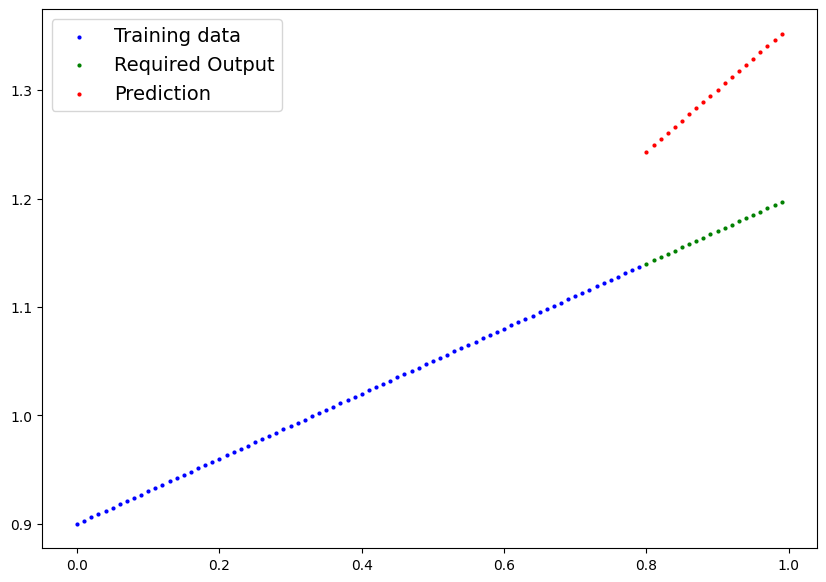

In [58]:
# Output after training for 300 epochs
plot_predictions(predictions = y_predictions.cpu())

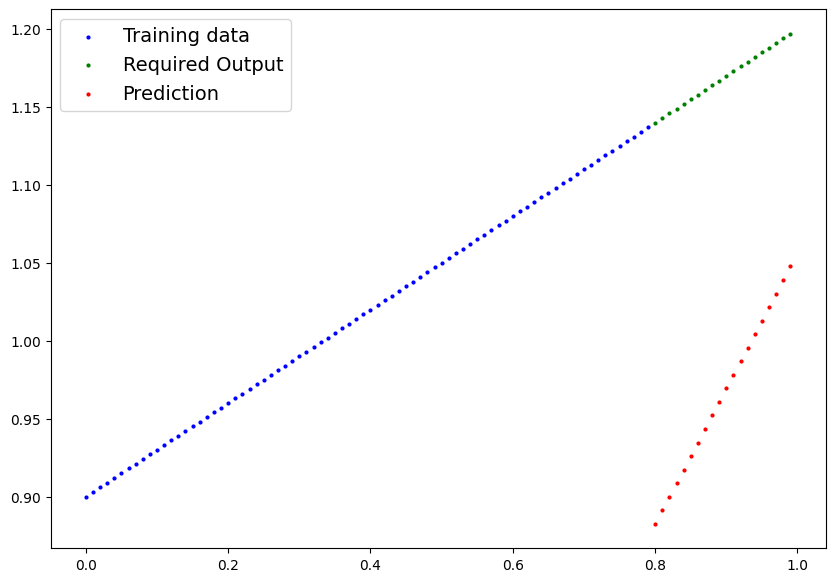

In [59]:
# Output befor Training (i.e. random weight and bias)
plot_predictions(predictions = y_predictions_before)

### 5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
8 Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [60]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = '01_workflow_model_test.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_test.state_dict(),
           f = MODEL_SAVE_PATH, )

Saving the model to: models/01_workflow_model_test.pth


In [61]:
# Loading the model

# Creating a new instance of the class
loaded_model = LinearRegressionModel()

print(f'state_dict of loaded_model: {loaded_model.state_dict()}')

# Load the saved state_dict values to this model
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model on the preffered device
loaded_model.to(device)

state_dict of loaded_model: OrderedDict([('linear_layer.weight', tensor([[0.7388]])), ('linear_layer.bias', tensor([0.1354]))])


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [62]:
# check the device on which the model is running
next(loaded_model.parameters()).device

device(type='cpu')

In [63]:
# testing the model and comparing it with the oringinal model
loaded_model.eval()
with torch.inference_mode():
  y_pred_loaded = loaded_model(X_test)
y_pred_loaded == y_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])